# Cleaning and summary statistics for weather data pulled using the Dark Sky API
## Work in progress

To come:
* Variable definitions
* Notes about summary statistics 
* Splitting the datetime variables into separate date and time portions?

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.neighbors import KernelDensity

df = pd.read_csv(r'C:\Users\slbau\git\Bikeshare-DC\data\Dark_Sky_2010_2017.csv', parse_dates=[0], infer_datetime_format=True)
df.shape


(2922, 27)

In [2]:
# creating weather dummies
df = pd.concat([df, pd.get_dummies(df['precipType'])], axis=1)
df.rename(columns = {'rain':'rain_dummy','snow':'snow_dummy'}, inplace = True)

df.shape
print(df.columns)



Index(['date', 'apparentTemperatureHigh', 'apparentTemperatureHighTime',
       'apparentTemperatureLow', 'apparentTemperatureLowTime', 'cloudCover',
       'dewPoint', 'humidity', 'moonPhase', 'precipAccumulation',
       'precipIntensity', 'precipIntensityMax', 'precipIntensityMaxTime',
       'precipProbability', 'precipType', 'pressure', 'sunriseTime',
       'sunsetTime', 'temperatureHigh', 'temperatureHighTime',
       'temperatureLow', 'temperatureLowTime', 'time', 'visibility',
       'windBearing', 'windSpeed', 'daylightHours', 'rain_dummy',
       'snow_dummy'],
      dtype='object')


In [3]:
# converting Unix time to human-readable time
# can probably do this cleaner using regex
timevars = ['apparentTemperatureHighTime','apparentTemperatureLowTime','precipIntensityMaxTime',
           'sunriseTime','sunsetTime','temperatureHighTime','temperatureLowTime']
for var in timevars:
    df[var] = pd.to_datetime(df[var],unit='s')

df.head()

,date,apparentTemperatureHigh,apparentTemperatureHighTime,apparentTemperatureLow,apparentTemperatureLowTime,cloudCover,dewPoint,humidity,moonPhase,precipAccumulation,...,temperatureHighTime,temperatureLow,temperatureLowTime,time,visibility,windBearing,windSpeed,daylightHours,rain_dummy,snow_dummy
0,2010-01-01,37.98,2010-01-01 18:00:00,14.02,2010-01-02 12:00:00,0.76,28.29,0.76,0.53,NaN,...,2010-01-01 18:00:00,26.91,2010-01-02 13:00:00,1262322000,7.02,313,7.34,9.497222,1,0
1,2010-01-02,14.32,2010-01-02 13:00:00,0.17,2010-01-03 12:00:00,0.44,8.43,0.46,0.57,0.309,...,2010-01-02 18:00:00,16.74,2010-01-03 13:00:00,1262408400,9.98,308,19.70,9.509167,0,1
2,2010-01-03,16.06,2010-01-04 00:00:00,10.07,2010-01-04 04:00:00,0.22,3.76,0.45,0.61,0.675,...,2010-01-04 00:00:00,23.42,2010-01-04 06:00:00,1262494800,10.00,300,19.90,9.521944,0,1
3,2010-01-04,22.15,2010-01-04 21:00:00,17.40,2010-01-05 10:00:00,0.60,10.91,0.49,0.65,NaN,...,2010-01-04 20:00:00,27.26,2010-01-05 12:00:00,1262581200,10.00,302,13.09,9.535556,0,0
4,2010-01-05,24.72,2010-01-05 19:00:00,18.87,2010-01-06 09:00:00,0.84,13.59,0.50,0.68,NaN,...,2010-01-05 19:00:00,29.16,2010-01-06 10:00:00,1262667600,9.99,304,11.99,9.550278,0,0


In [4]:
# summary statistics
print(df.describe())

       apparentTemperatureHigh  apparentTemperatureLow   cloudCover  \
count              2922.000000             2922.000000  2916.000000   
mean                 65.450681               49.659582     0.353282   
std                  20.745388               19.736641     0.249634   
min                   2.240000              -10.840000     0.000000   
25%                  51.045000               33.285000     0.160000   
50%                  67.595000               52.240000     0.280000   
75%                  82.245000               67.270000     0.480000   
max                 113.670000               90.060000     1.000000   

          dewPoint     humidity    moonPhase  precipAccumulation  \
count  2922.000000  2922.000000  2922.000000          124.000000   
mean     46.026218     0.667645     0.500065            1.182863   
std      18.536844     0.135031     0.288220            2.406253   
min      -9.730000     0.210000     0.000000            0.000000   
25%      31.220000  

In [5]:
# KDE with Scikit-Learn

def kde_sklearn(x, x_grid, bandwidth=0.2, **kwargs):
    kde_skl = KernelDensity(bandwidth=bandwidth, **kwargs)
    kde_skl.fit(x[:, np.newaxis])
    # score_samples returns log-likelihood of samples
    log_pdf = kde_skl.score_samples(x_grid[:, np.newaxis])
    return np.exp(log_pdf)

def density(column, bandwidth=0.2, **kwargs):   
    x_grid = np.linspace(df.loc[:, column].min(), df.loc[:, column].max())
    x = df.loc[:, column]
    pdf = kde_sklearn(x, x_grid, bandwidth=bandwidth)
    ax.plot(x_grid, pdf, color='blue', alpha=0.5, lw=1)
    ax.set_title('KDE for %s' %(column))
    plt.show()

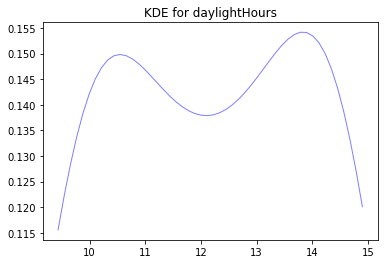

In [6]:
%matplotlib inline
# can use the density function to produce KDEs for any single variable
# couldn't figure out how to do all numeric variables in 5x4 subplots
# doesn't work with NaN

fig, ax = plt.subplots()
density('daylightHours', bandwidth=1)

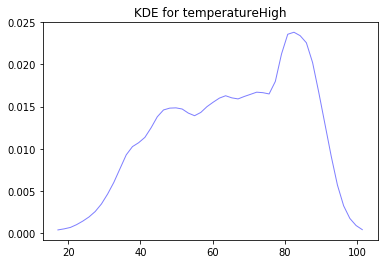

In [7]:
%matplotlib inline
fig, ax = plt.subplots()
density('temperatureHigh', bandwidth=2)

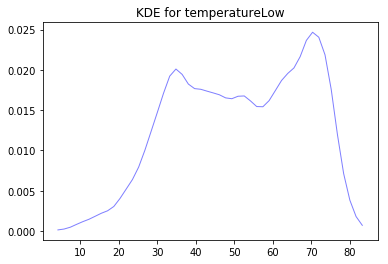

In [8]:
%matplotlib inline
fig, ax = plt.subplots()
density('temperatureLow', bandwidth=2)